## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [1]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, ReLU
# from keras.applications import VGG16
from keras.applications import vgg16
# from keras.optimizers import Adam
from keras.optimizers import adam_v2
from keras.preprocessing.image import ImageDataGenerator

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [2]:
# # if you are using google colab for this task you can mount your GoogleDrive as follows: 
# from google.colab import drive
# drive.mount('/content/drive/')

# # After running this cell you should enter the authorization code from your Google account

In [3]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = './data/Lab5/train'
val =   './data/Lab5/val'
test =  './data/Lab5/test'


# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size 
nb_validation_samples = 2490
# test set size
nb_test_samples = 20000

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [4]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [5]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(img_width, img_height, channels)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# 3:
model.add(Conv2D(32, (3, 3)))
#     +Relu
model.add(Activation('relu'))

# 4:  +Pooling 
model.add(MaxPooling2D(pool_size=(2,2)))

# 5:  +Convolutional
model.add(Conv2D(64, (3,3)))
#     +Relu
model.add(Activation('relu'))

# 6:  +Pooling 
model.add(MaxPooling2D(pool_size=(2,2)))

# 7:  +Flattening
model.add(Flatten())

# 8:  +Dense
model.add(Dense(64))
#     +ReLu
model.add(Activation('relu'))

# 9:  +Dropout
model.add(Dropout(.5))

# 10: +Dense
model.add(Dense(1))
#     +Sigmoid
model.add(Activation('sigmoid'))


In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              run_eagerly=True)

In [8]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

sugg_model = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
    )

Epoch 1/5


c:\Unic-ITMO\ML\_proj\.venv\lib\site-packages\ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


312/312 [==============================] - 284s 910ms/step - loss: 0.6155 - accuracy: 0.6512 - val_loss: 0.5437 - val_accuracy: 0.7307
Epoch 2/5
312/312 [==============================] - 323s 1s/step - loss: 0.5239 - accuracy: 0.7431 - val_loss: 0.4855 - val_accuracy: 0.7775
Epoch 3/5
312/312 [==============================] - 238s 763ms/step - loss: 0.4562 - accuracy: 0.7905 - val_loss: 0.4386 - val_accuracy: 0.8014
Epoch 4/5
312/312 [==============================] - 241s 772ms/step - loss: 0.4057 - accuracy: 0.8204 - val_loss: 0.4307 - val_accuracy: 0.7977
Epoch 5/5
312/312 [==============================] - 220s 705ms/step - loss: 0.3754 - accuracy: 0.8326 - val_loss: 0.4390 - val_accuracy: 0.7977


In [9]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

c:\Unic-ITMO\ML\_proj\.venv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy on test data: 79.96%


Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

In [10]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

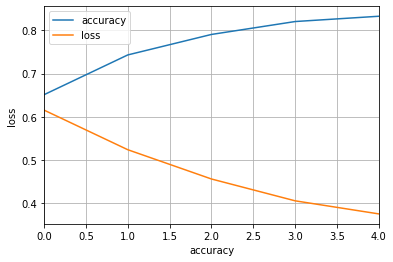

In [13]:
# plt.figure(figsize = (,20))

plt.plot(sugg_model.history['accuracy'], label='accuracy')
plt.plot(sugg_model.history['loss'], label='loss')

plt.grid()
plt.xlim(0, 4)
plt.legend()

plt.xlabel('accuracy')
plt.ylabel('loss')

plt.show()

Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [14]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = vgg16.VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [15]:
# add layers to VGG16:

model = Sequential()
model.add(vgg16_net)

# + flattening
model.add(Flatten())

# + Dense fullyconnected layer with 256 neurons
model.add(Dense(256))

# + ReLu
# model.add(ReLU())
model.add(Activation('relu'))

# + Dropout
model.add(Dropout(.5))

# + Dense layer with 1 neuron
model.add(Dense(1))

# + sigmoid
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
 activation_6 (Activation)   (None, 1)                

In [16]:
model.compile(loss='binary_crossentropy',
            #   optimizer=Adam(lr=1e-5), 
              optimizer='adam', 
              metrics=['accuracy'])

E.g., it was like:


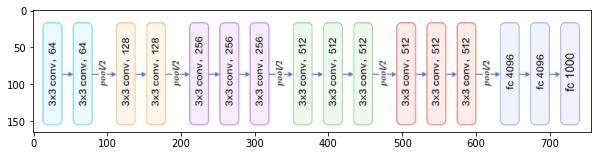

In [ ]:
img = mpimg.imread('./data/Lab5/VGG16.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

and it becomes:

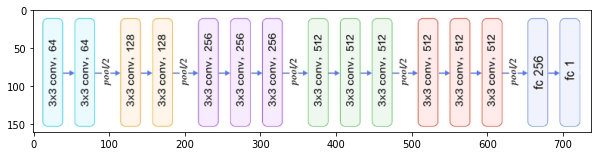

In [ ]:
img = mpimg.imread('./data/Lab5/VGG162.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

In [17]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

modified_vgg162 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/5


c:\Unic-ITMO\ML\_proj\.venv\lib\site-packages\ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


312/312 [==============================] - 1482s 5s/step - loss: 0.3149 - accuracy: 0.8660 - val_loss: 0.2266 - val_accuracy: 0.9128
Epoch 2/5
312/312 [==============================] - 1476s 5s/step - loss: 0.2263 - accuracy: 0.9060 - val_loss: 0.2269 - val_accuracy: 0.9075
Epoch 3/5
312/312 [==============================] - 1440s 5s/step - loss: 0.2084 - accuracy: 0.9123 - val_loss: 0.2116 - val_accuracy: 0.9149
Epoch 4/5
312/312 [==============================] - 1515s 5s/step - loss: 0.1884 - accuracy: 0.9215 - val_loss: 0.2044 - val_accuracy: 0.9211
Epoch 5/5
312/312 [==============================] - 1457s 5s/step - loss: 0.1741 - accuracy: 0.9288 - val_loss: 0.2134 - val_accuracy: 0.9194


In [18]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

c:\Unic-ITMO\ML\_proj\.venv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy on test data: 90.20%


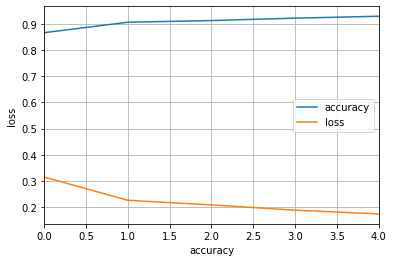

In [21]:
plt.plot(modified_vgg162.history['accuracy'], label='accuracy')
plt.plot(modified_vgg162.history['loss'], label='loss')

plt.grid()
plt.xlim(0, 4)

plt.xlabel('accuracy')
plt.ylabel('loss')

plt.legend()

plt.show()

In [60]:
from keras.applications.resnet import preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import random, os

In [69]:
def checking(files, model, target_size=(img_width, img_height)):
    for file in files:
        img = image.load_img(file, target_size=target_size)
        plt.imshow(img)

        img_array = image.img_to_array(img)
        img_batch = np.expand_dims(img_array, axis=0)

        img_preprocessed = preprocess_input(img_batch)

        prediction = model.predict(img_preprocessed)
        proba = prediction[0][0]
        suggestion = 'Dog' if proba > 0.5 else 'Cat'

        plt.title("Predicted as {} ({:.9f})".format(suggestion, proba))
        plt.show()
        continue
    pass

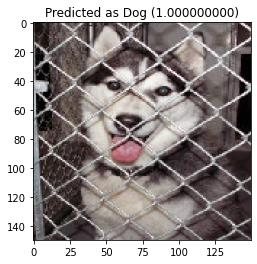

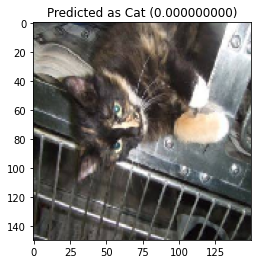

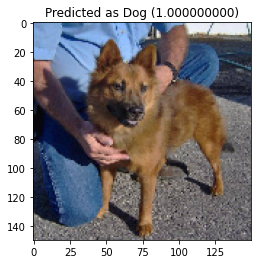

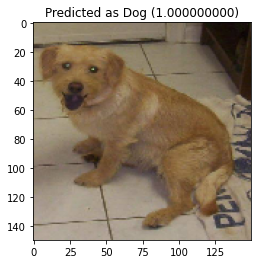

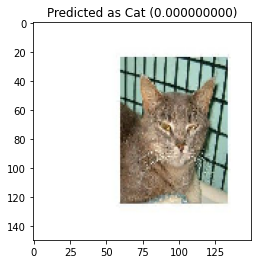

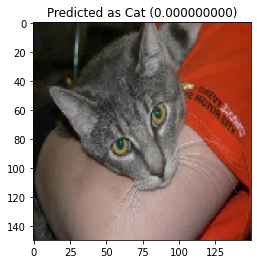

In [82]:
files_to_check_dogs = ['./data/Lab5/val/dogs/'+i for i in random.choices(os.listdir('./data/Lab5/val/dogs/'), k=3)]
files_to_check_cats = ['./data/Lab5/val/cats/'+i for i in random.choices(os.listdir('./data/Lab5/val/cats/'), k=3)]
files_to_check = files_to_check_dogs + files_to_check_cats
random.shuffle(files_to_check)
checking(files_to_check, model)